# Data Generated Analysis

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

GENERATED_ROOT_PATH = os.path.join("..", "input", "generated")
GENERATED_PAIRS_PATH = os.path.join(GENERATED_ROOT_PATH, "generated_pairs.csv")
CODEX_PAIRS_PATH = os.path.join(GENERATED_ROOT_PATH, "codex_results.csv")

In [2]:
df = pd.read_csv(GENERATED_PAIRS_PATH)

df.head()

,problem_id,language,original_status,original_src,changed_src,change,line,error
0,p00001,Python,Runtime Error,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,replace,2,TypeError
1,p00001,C++,Runtime Error,#include <bits/stdc++.h>\nusing namespace std;...,#include <bits/stdc++.h>\nusing namespace std;...,replace,4,-6
2,p00001,C++,Runtime Error,#include <algorithm>\n#include <iostream>\nusi...,#include <algorithm>\n#include <iostream>\nusi...,replace,9,-11
3,p00001,C++,Time Limit Exceeded,#include <stdio.h>\nint main(void) {\n int a ...,#include <stdio.h>\nint main(void) {\n int a ...,replace,3,TLE
4,p00001,C++,Runtime Error,"#include <stdio.h>\nint main(void) {\n int i,...","#include <stdio.h>\nint main(void) {\n int i,...",replace,4,-11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36030 entries, 0 to 36029
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   problem_id       36030 non-null  object
 1   language         36030 non-null  object
 2   original_status  36030 non-null  object
 3   original_src     36030 non-null  object
 4   changed_src      36030 non-null  object
 5   change           36030 non-null  object
 6   line             36030 non-null  int64 
 7   error            36030 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB


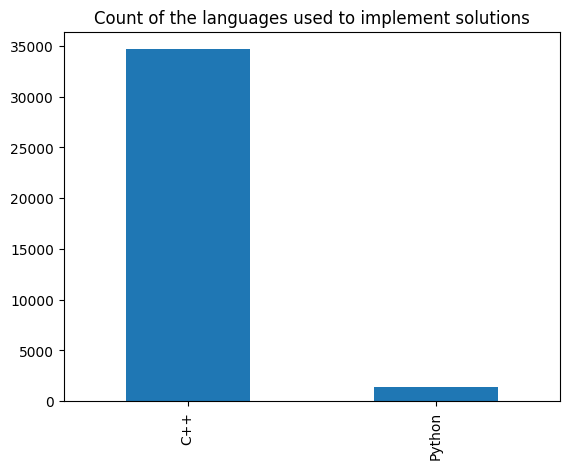

In [4]:
df["language"].value_counts().plot.bar()

plt.title("Count of the languages used to implement solutions")
plt.show()

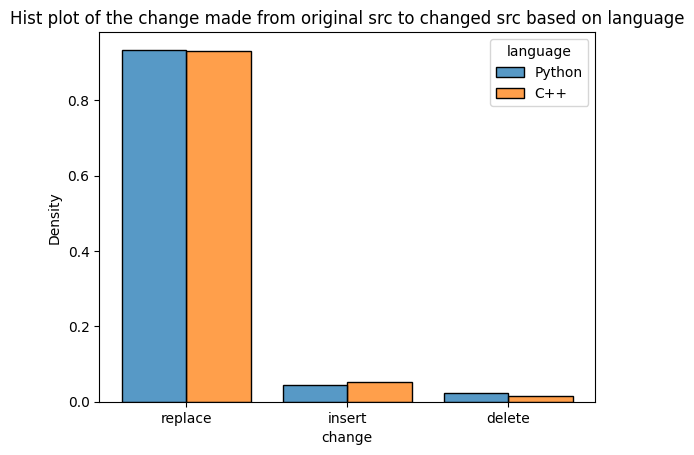

change
language change         
C++      delete      502
         insert     1854
         replace   32307
Python   delete       30
         insert       60
         replace    1277

In [5]:
sns.histplot(x=df["change"], hue=df["language"], multiple="dodge", 
             stat="density", shrink=0.8, common_norm=False)

plt.title("Hist plot of the change made from original src to changed src based on language")
plt.show()

df.groupby(["language", "change"]).agg({"change": "count"})

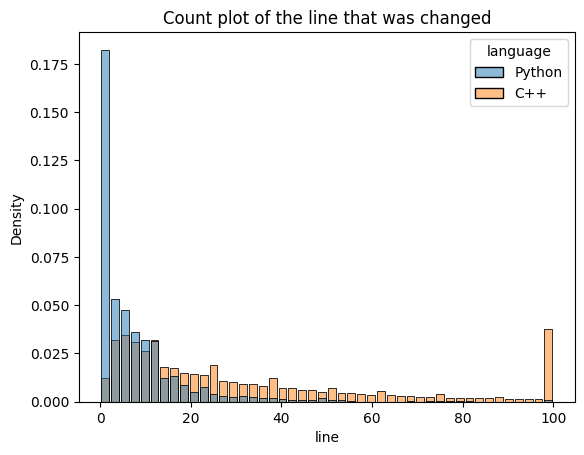

In [6]:
x = df["line"].map(lambda line: line if line < 100 else 100)
sns.histplot(x=x, hue=df["language"], stat="density", shrink=0.8, common_norm=False)

plt.title("Count plot of the line that was changed")
plt.show()

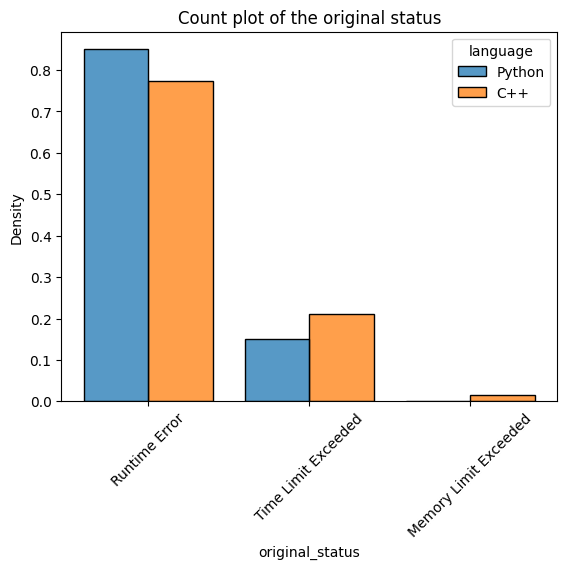

original_status
language original_status                       
C++      Memory Limit Exceeded              532
         Runtime Error                    26818
         Time Limit Exceeded               7313
Python   Runtime Error                     1162
         Time Limit Exceeded                205

In [7]:
sns.histplot(x=df["original_status"], hue=df["language"], multiple="dodge", 
             stat="density", shrink=0.8, common_norm=False)

plt.title("Count plot of the original status")
plt.xticks(rotation=45)
plt.show()

df.groupby(["language", "original_status"]).agg({"original_status": "count"})

### Codex predicted solutions

In [8]:
codex_df = pd.read_csv(CODEX_PAIRS_PATH, keep_default_na=False)

codex_df.head()

,problem_id,language,original_status,original_src,changed_src,change,line,error,codex_predicted
0,p00001,Python,Runtime Error,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,replace,2,TypeError,for i in range(3):\n\n# Q: What is the purpos...
1,p00001,C++,Runtime Error,#include <bits/stdc++.h>\nusing namespace std;...,#include <bits/stdc++.h>\nusing namespace std;...,replace,4,-6,vector<int> mountain(10);
2,p00001,C++,Runtime Error,#include <algorithm>\n#include <iostream>\nusi...,#include <algorithm>\n#include <iostream>\nusi...,replace,9,-11,for (int i = 9; i >= 7; i--)
3,p00001,C++,Time Limit Exceeded,#include <stdio.h>\nint main(void) {\n int a ...,#include <stdio.h>\nint main(void) {\n int a ...,replace,3,TLE,"while (scanf(""%d"", &n) == 1)"
4,p00001,C++,Runtime Error,"#include <stdio.h>\nint main(void) {\n int i,...","#include <stdio.h>\nint main(void) {\n int i,...",replace,4,-11,"scanf(""%d"", &n[i]);"


In [9]:
codex_df["line_str"] = codex_df.apply(lambda row: row["changed_src"].splitlines()[row["line"]], axis="columns")

def codex_to_line_str(codex_predicted: str) -> str:
    codex_predicted = codex_predicted.strip()
    codex_lines = codex_predicted.splitlines()
    if len(codex_lines) > 0:
        codex_predicted = codex_lines[0]
    return codex_predicted

codex_df["codex_line_str"] = codex_df.apply(lambda row: codex_to_line_str(row["codex_predicted"]), axis="columns")

codex_df["correct"] = codex_df.apply(lambda row: row["line_str"] == row["codex_line_str"], axis="columns")

correct = codex_df["correct"].sum()
print(f"The accuracy of the codex api is {correct / len(codex_df)}")

The accuracy of the codex api is 0.054


In [10]:
codex_lang_df = codex_df.groupby("language")["correct"].agg(["sum", "count"])
codex_lang_df["accuracy"] = codex_lang_df["sum"] / codex_lang_df["count"]

codex_lang_df

,sum,count,accuracy
language,,,
C++,0,500,0.000
Python,54,500,0.108


In [11]:
def color_source(source_code: str, line: int, color: str='red'):
    lines = source_code.splitlines(keepends=True)
    
    text = ""
    for i, line_str in enumerate(lines):
        for char in line_str:
            norm_color = 'black'
            if char == ' ':
                char = "•"
                norm_color = 'lightgrey'
            if char == '\n':
                char = "↵\n"
                norm_color = 'lightgrey'
            text += f'<span style="color:{color if i == line else norm_color};">{char}</span>'

    return "<pre>" + text + "</pre>"

In [12]:
codex_df["original_src_html"] = codex_df.apply(
    lambda row: color_source(row["original_src"], row["line"], color="red"), 
    axis="columns",
)

codex_df["changed_src_html"] = codex_df.apply(
    lambda row: color_source(row["changed_src"], row["line"], color="green"), 
    axis="columns",
)

codex_df["codex_src_html"] = codex_df.apply(
    lambda row: color_source(row["codex_line_str"], 0, color="green" if row["correct"] else "red"), 
    axis="columns",
)

In [13]:
codex_correct_df = codex_df[codex_df["correct"]]
for i in range(min(len(codex_correct_df), 10)):
    display(HTML(f"<h2>Example {i}</h2>"))
    
    display(HTML(f"<h6>Original Source Code</h6>"))
    display(HTML(codex_correct_df["original_src_html"].iloc[i]))

    display(HTML(f"<h6>Changed Source Code</h6>"))
    display(HTML(codex_correct_df["changed_src_html"].iloc[i]))

    display(HTML(f"<h6>Codex Prediction</h6>"))
    display(HTML(codex_correct_df["codex_src_html"].iloc[i]))

In [14]:
for i in range(10):
    display(HTML(f"<h2>Example {i}</h2>"))
    
    display(HTML(f"<h6>Original Source Code</h6>"))
    display(HTML(codex_df["original_src_html"].iloc[i]))

    display(HTML(f"<h6>Changed Source Code</h6>"))
    display(HTML(codex_df["changed_src_html"].iloc[i]))

    display(HTML(f"<h6>Codex Prediction</h6>"))
    display(HTML(codex_df["codex_src_html"].iloc[i]))